# Pandas library

This library is based on [numpy]() that we discuss in a previous lesson and is giving to python a new object which will allows to work with "relational" or "labeled" data in an easy way.
That provide python with a similar access to data comming from Database or Spreadsheet than the one you can find in language like R.

This is made more for datascience than pure numerical analysis but the tools can be combined together.

The library is providing input/output tools with who it is possible to open/save data from MS Excel, CSV or HDF5 files.

As usual we are going to import the library

In [1]:
import pandas

We will later plot some data so we are importing the library matplotlib

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

And we are going where our data are located:

In [3]:
cd data

/home/gruel/Documents/Cours/Python advanced class - Jupyter notebook/data


In [4]:
%more gapminder_gdp_europe.csv

In [5]:
pandas.read_csv?

Inside this directory you will find a file called *gapminder_gdp_europe.csv* that is coming from the software carpentry project. This file have one column which contains the name of the countries and the other one are the value of GDP for a certain year. 
We are saying to pandas to use the columns 'country' as our row labels.

In [6]:
data = pandas.read_csv('gapminder_gdp_europe.csv', 
                       index_col='country')

We can check what are the type of this object:

In [7]:
type(data)

pandas.core.frame.DataFrame

We have a new object type called DataFrame who contains our data

In [8]:
print(data)

                        gdpPercap_1952  gdpPercap_1957  gdpPercap_1962  \
country                                                                  
Albania                    1601.056136     1942.284244     2312.888958   
Austria                    6137.076492     8842.598030    10750.721110   
Belgium                    8343.105127     9714.960623    10991.206760   
Bosnia and Herzegovina      973.533195     1353.989176     1709.683679   
Bulgaria                   2444.286648     3008.670727     4254.337839   
Croatia                    3119.236520     4338.231617     5477.890018   
Czech Republic             6876.140250     8256.343918    10136.867130   
Denmark                    9692.385245    11099.659350    13583.313510   
Finland                    6424.519071     7545.415386     9371.842561   
France                     7029.809327     8662.834898    10560.485530   
Germany                    7144.114393    10187.826650    12902.462910   
Greece                     3530.690067

In [9]:
data

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Albania,1601.056136,1942.284244,2312.888958,2760.196931,3313.422188,3533.003910,3630.880722,3738.932735,2497.437901,3193.054604,4604.211737,5937.029526
Austria,6137.076492,8842.598030,10750.721110,12834.602400,16661.625600,19749.422300,21597.083620,23687.826070,27042.018680,29095.920660,32417.607690,36126.492700
Belgium,8343.105127,9714.960623,10991.206760,13149.041190,16672.143560,19117.974480,20979.845890,22525.563080,25575.570690,27561.196630,30485.883750,33692.605080
Bosnia and Herzegovina,973.533195,1353.989176,1709.683679,2172.352423,2860.169750,3528.481305,4126.613157,4314.114757,2546.781445,4766.355904,6018.975239,7446.298803
Bulgaria,2444.286648,3008.670727,4254.337839,5577.002800,6597.494398,7612.240438,8224.191647,8239.854824,6302.623438,5970.388760,7696.777725,10680.792820
Croatia,3119.236520,4338.231617,5477.890018,6960.297861,9164.090127,11305.385170,13221.821840,13822.583940,8447.794873,9875.604515,11628.388950,14619.222720
Czech Republic,6876.140250,8256.343918,10136.867130,11399.444890,13108.453600,14800.160620,15377.228550,16310.443400,14297.021220,16048.514240,17596.210220,22833.308510
Denmark,9692.385245,11099.659350,13583.313510,15937.211230,18866.207210,20422.901500,21688.040480,25116.175810,26406.739850,29804.345670,32166.500060,35278.418740
Finland,6424.519071,7545.415386,9371.842561,10921.636260,14358.875900,15605.422830,18533.157610,21141.012230,20647.164990,23723.950200,28204.590570,33207.084400


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, Albania to United Kingdom
Data columns (total 12 columns):
gdpPercap_1952    30 non-null float64
gdpPercap_1957    30 non-null float64
gdpPercap_1962    30 non-null float64
gdpPercap_1967    30 non-null float64
gdpPercap_1972    30 non-null float64
gdpPercap_1977    30 non-null float64
gdpPercap_1982    30 non-null float64
gdpPercap_1987    30 non-null float64
gdpPercap_1992    30 non-null float64
gdpPercap_1997    30 non-null float64
gdpPercap_2002    30 non-null float64
gdpPercap_2007    30 non-null float64
dtypes: float64(12)
memory usage: 3.0+ KB


In [11]:
data.shape

(30, 12)

If it seems to be an array-like you cannot access the elements as with numpy array:

In [12]:
data[0,0]

KeyError: (0, 0)

To get access to the first row, first columns element, we can use the numpy indexes using the method **iloc** followed by the position (starting by 0 as usual in python):

In [13]:
print(data.iloc[0,0])

1601.056136


or we can use the keys with the method **loc**

In [14]:
print(data.loc["Albania", "gdpPercap_1952"])

1601.056136


It is possible to obtain all the information related to a country (i.e. a row):

In [15]:
print(data.loc["Albania", :])

gdpPercap_1952    1601.056136
gdpPercap_1957    1942.284244
gdpPercap_1962    2312.888958
gdpPercap_1967    2760.196931
gdpPercap_1972    3313.422188
gdpPercap_1977    3533.003910
gdpPercap_1982    3630.880722
gdpPercap_1987    3738.932735
gdpPercap_1992    2497.437901
gdpPercap_1997    3193.054604
gdpPercap_2002    4604.211737
gdpPercap_2007    5937.029526
Name: Albania, dtype: float64


or per GDP per year (i.e. per columns:)

In [16]:
print(data.loc[:, "gdpPercap_1952"])

country
Albania                    1601.056136
Austria                    6137.076492
Belgium                    8343.105127
Bosnia and Herzegovina      973.533195
Bulgaria                   2444.286648
Croatia                    3119.236520
Czech Republic             6876.140250
Denmark                    9692.385245
Finland                    6424.519071
France                     7029.809327
Germany                    7144.114393
Greece                     3530.690067
Hungary                    5263.673816
Iceland                    7267.688428
Ireland                    5210.280328
Italy                      4931.404155
Montenegro                 2647.585601
Netherlands                8941.571858
Norway                    10095.421720
Poland                     4029.329699
Portugal                   3068.319867
Romania                    3144.613186
Serbia                     3581.459448
Slovak Republic            5074.659104
Slovenia                   4215.041741
Spain            

It is possible to slice it:

In [17]:
print(data.loc['Italy':'Poland', 'gdpPercap_1962':'gdpPercap_1972'])

             gdpPercap_1962  gdpPercap_1967  gdpPercap_1972
country                                                    
Italy           8243.582340    10022.401310    12269.273780
Montenegro      4649.593785     5907.850937     7778.414017
Netherlands    12790.849560    15363.251360    18794.745670
Norway         13450.401510    16361.876470    18965.055510
Poland          5338.752143     6557.152776     8006.506993


And we can do some operation on the numerical like finding the maximum of GDP for this slice:

In [18]:
print(data.loc['Italy':'Poland', 'gdpPercap_1962':'gdpPercap_1972'].max())

gdpPercap_1962    13450.40151
gdpPercap_1967    16361.87647
gdpPercap_1972    18965.05551
dtype: float64


or the minimum value

In [19]:
print(data.loc['Italy':'Poland', 'gdpPercap_1962':'gdpPercap_1972'].min())

gdpPercap_1962    4649.593785
gdpPercap_1967    5907.850937
gdpPercap_1972    7778.414017
dtype: float64


We can create variable which will contains a subset of the data:

In [20]:
subset = data.loc['Italy':'Poland', 'gdpPercap_1962':'gdpPercap_1972']
print('Subset of data:\n', subset)

Subset of data:
              gdpPercap_1962  gdpPercap_1967  gdpPercap_1972
country                                                    
Italy           8243.582340    10022.401310    12269.273780
Montenegro      4649.593785     5907.850937     7778.414017
Netherlands    12790.849560    15363.251360    18794.745670
Norway         13450.401510    16361.876470    18965.055510
Poland          5338.752143     6557.152776     8006.506993


We can select object in function of certain criteria. Here if the GDP is greater than 10 000. We are creating a mask (similar to the numpy masked array) and we are printing only the object which validate the condition

In [21]:
mask = subset > 10000
print(subset[mask])

             gdpPercap_1962  gdpPercap_1967  gdpPercap_1972
country                                                    
Italy                   NaN     10022.40131     12269.27378
Montenegro              NaN             NaN             NaN
Netherlands     12790.84956     15363.25136     18794.74567
Norway          13450.40151     16361.87647     18965.05551
Poland                  NaN             NaN             NaN


We can ask pandas to describe statistically the data using the method **describe**

In [22]:
print(subset[subset > 10000].describe())

       gdpPercap_1962  gdpPercap_1967  gdpPercap_1972
count        2.000000        3.000000        3.000000
mean     13120.625535    13915.843047    16676.358320
std        466.373656     3408.589070     3817.597015
min      12790.849560    10022.401310    12269.273780
25%      12955.737547    12692.826335    15532.009725
50%      13120.625535    15363.251360    18794.745670
75%      13285.513523    15862.563915    18879.900590
max      13450.401510    16361.876470    18965.055510


It is possible to plot the change of GDP for a specific country:

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 8 Text xticklabel objects>)

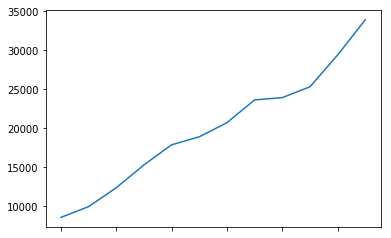

In [23]:
data.loc['Sweden'].plot()
plt.xticks(rotation=90)

If you want to analyse the data with a histogram where every columns will represent a country. You can transpose the data. Here we are transposing for the first three countries:

In [24]:
data[0:3].T

country,Albania,Austria,Belgium
gdpPercap_1952,1601.056136,6137.076492,8343.105127
gdpPercap_1957,1942.284244,8842.598030,9714.960623
gdpPercap_1962,2312.888958,10750.721110,10991.206760
gdpPercap_1967,2760.196931,12834.602400,13149.041190
gdpPercap_1972,3313.422188,16661.625600,16672.143560
gdpPercap_1977,3533.003910,19749.422300,19117.974480
gdpPercap_1982,3630.880722,21597.083620,20979.845890
gdpPercap_1987,3738.932735,23687.826070,22525.563080
gdpPercap_1992,2497.437901,27042.018680,25575.570690
gdpPercap_1997,3193.054604,29095.920660,27561.196630


And we are plotting the histogram. For people use to R, it is possible to adjust the properties of the plot to be similar to the **ggpplot** package use in R:

Text(0,0.5,'GDP per capita')

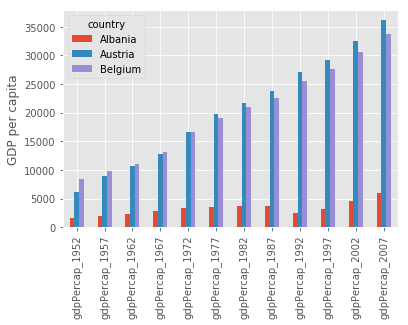

In [25]:
plt.style.use('ggplot')
data[0:3].T.plot(kind='bar')
plt.xticks(rotation=90)
plt.ylabel('GDP per capita')

<div style='background:#B1E0A8; padding:10px 10px 10px 10px;'>
<H2> Challenges </H2>
<li>
Create two variables ```gdp_sweden``` and ```gdp_iceland``` which will contains the gdp for the Sweden and Iceland.
</li>
<li>
plot the change in GDP per year.
</li>
 <ol>
 </div>

In [26]:
gdp_sweden = data.loc['Sweden']
gdp_iceland = data.loc['Iceland']

Text(0,0.5,'GDP per capita ($)')

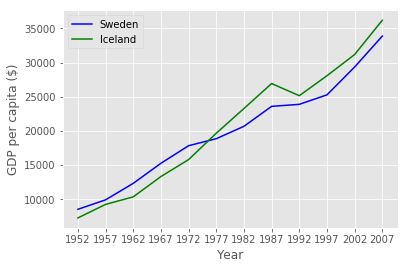

In [27]:
years = data.columns.str.strip('gdpPercap_')
plt.plot(years, gdp_sweden, 'b-', label='Sweden')
plt.plot(years, gdp_iceland, 'g-', label='Iceland')

# Create legend.
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('GDP per capita ($)')

<div style='background:#B1E0A8; padding:10px 10px 10px 10px;'>
<H2> Challenges </H2>

 <ol>
 <li>Read the data of the file ```agelist.txt``` using python and create a dictionary which will contains the datas (the key should be the name)
 </li>
 <li>
 Read the same file using pandas and create a dataframe df with the data.
 Hint: you cannot use read_csv function but pandas does provide a fixed formed reader (read_fwf)
 </li>
 
 </div>

In [28]:
with open('agelist.txt') as f:
    data = f.readlines()

data = data[1:]
d = {}
for i, line in enumerate(data):
    line = line.strip().split()
    d[line[0]] = int(line[1])
print(d)

{'Bob': 18, 'Jane': 24, 'Alice': 35}


In [29]:
import pandas 
df = pandas.read_fwf('agelist.txt')  # fixed width formatted

In [30]:
df

,Name,Age
0,Bob,18
1,Jane,24
2,Alice,35


In [31]:
df.keys()

Index(['Name', 'Age'], dtype='object')

In [32]:
df['Name']

0      Bob
1     Jane
2    Alice
Name: Name, dtype: object

In [33]:
df[df['Name'] == 'Bob']['Age']

0    18
Name: Age, dtype: int64

In [34]:
df['Name']

0      Bob
1     Jane
2    Alice
Name: Name, dtype: object

In [35]:
df2 = pandas.read_fwf('agelist.txt', index_col='Name')

In [36]:
df2

,Age
Name,
Bob,18
Jane,24
Alice,35
